In [1]:
%run ./Preamble.ipynb

all_models = PM.check_for_existing_patterns("activations")
# Uncomment below lines to use specific model sets:
# all_models=PM.gpt2xl_models
# all_models=PM.gpt2_models
# all_models=['gpt2','gpt2-untrained_1','gpt2-untrained_1_weight_config_all']
print(all_models)



['gpt2-xl', 'gpt2-xl-untrained_1', 'gpt2', 'gpt2-untrained_1', 'gpt2-untrained_2', 'gpt2-untrained_3', 'gpt2-untrained_4', 'gpt2-untrained_5', 'gpt2-untrained_6', 'gpt2-untrained_7', 'gpt2-untrained_8', 'gpt2-untrained_9', 'gpt2-untrained_1_weight_config_all', 'gpt2-untrained_2_weight_config_all', 'gpt2-untrained_3_weight_config_all', 'gpt2-untrained_4_weight_config_all', 'gpt2-untrained_5_weight_config_all', 'gpt2-untrained_6_weight_config_all', 'gpt2-untrained_7_weight_config_all', 'gpt2-untrained_8_weight_config_all', 'gpt2-untrained_9_weight_config_all']


In [2]:
# ========================================
# Load scores
# ========================================

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm

# Models to test (from calculation notebook)
Linear=LinearRegression()
SVC_model=svm.SVC(kernel='linear')
SVR_model=svm.SVR(kernel='linear')
Logistic1=LogisticRegression(random_state=1,penalty="l1",solver="saga",tol=.1,max_iter=1000)
Logistic2=LogisticRegression(random_state=1,tol=.1,solver="newton-cg",max_iter=1000)
Logistic3=LogisticRegression(random_state=1,penalty="l1",solver="saga",tol=.1,warm_start=True)
Logistic4=LogisticRegression(random_state=1,tol=.1,solver="newton-cg",warm_start=True)
LinearSVC_model=svm.LinearSVC()

# Store model labels for later use
svm_labels=[str(x) for x in [Linear,SVC_model,SVR_model,Logistic1,Logistic2,Logistic3,Logistic4,LinearSVC_model]]

def load_all_scores(**kwargs):
    """
    Load all scores for the provided targets and models using the specified SVM model.

    Args:
        kwargs: Additional arguments to be passed to the scoring function.

    Returns:
        dict: A dictionary with (target, model, layer, svm_model) as keys and scores as values.
    """
    def _load_all_scores(targets=None, models=all_models, svm_model=None, **kwargs):
        for target in targets:
            for model in models:
                for layer in layers_dict[model]:
                    score = load_score(target, model, layer, svm_model, **kwargs)
                    yield ((target, model, layer, str(svm_model)), score)
    def load_score(target=0, model=None, layer=0, svm_model=None, max_instances=10000, v=0, time=0, **kwargs):
        """
        Load the score for a given target, model, and layer from saved results.

        Args:
            target (int): Target label or index.
            model (str): Model label.
            layer (int): Layer index.
            svm_model: The SVM model used for scoring.
            max_instances (int, optional): Maximum number of instances (default is 10000).
            v (int, optional): Verbosity (default is 0).
            time (int, optional): Time parameter (default is 0).

        Returns:
            float: Score for the specified configuration.
        """
        score_save_name=f"{HOME}/data/experiment_1_results/{model},{target},{layer},{max_instances},{str(svm_model)},v2.csv"
        # print(f"{score_save_name=}")
        predict_save_name=f"{HOME}/data/experiment_1_results/{model},{target},{layer},{max_instances},{str(svm_model)},v2.npz"
        df=pd.read_csv(score_save_name)
        return df["score"][0]
    return dict(list(_load_all_scores(**kwargs)))


# Load scores from calculation notebook
res_pos_classification_Logistic1 = load_all_scores(targets=pos_labels, svm_model=Logistic1)
res_pos_classification_Logistic2 = load_all_scores(targets=my_classification_targets, svm_model=Logistic1)
res_reggresion = load_all_scores(targets=reggression_labels, svm_model=Linear)


In [3]:
# ========================================
# Prepare Data for Analysis
# ========================================

# Reload utilities
_=importlib.reload(DataDisplayer)
DD = DataDisplayer.DataDisplayer(PM)

# Combine all results into a single DataFrame
all_res_list = []
all_res_list += [(*ind, score) for ind, score in res_pos_classification_Logistic1.items()]
all_res_list += [(*ind, score) for ind, score in res_reggresion.items()]
all_res_list += [(*ind, score) for ind, score in res_pos_classification_Logistic2.items()]
df_all_res = pd.DataFrame(all_res_list, columns=["target", "model", "layer", "svm_model", "score"])

# Prepare the DataFrame for analysis
df_all_res = DD.prep_df_for_analysis(df_all_res)

# Extract unique targets, models, and layers
all_targets = list(df_all_res["target"].unique())
all_models = list(df_all_res["model"].unique())
all_layers = list(df_all_res["layer"].unique())
print(f"{all_targets=}")
print(f"{all_models=}")
print(f"{all_layers=}")

# Helper function for displaying DataFrames with model display names
def df_display(df):
    global model_display_names
    return df.replace({"model": model_display_names})

# Select results for specific models
linear_regression_res_df = select_data(df_all_res, svm_model=svm_labels[0])
logistic_regression_res_df = select_data(df_all_res, svm_model=svm_labels[3])


all_targets=['pos_tags', 'pos_tags-', 'pos_tags+', 'POS_12_id', 'POS_12_id-', 'POS_12_id+', 'POS_7_id', 'POS_7_id-', 'POS_7_id+', 'sentence_idx', 'sentence_idx-', 'sentence_idx+', 'unigram_probs', 'unigram_probs-', 'unigram_probs+', 'bigram_probs', 'bigram_probs-', 'bigram_probs+', 'trigram_probs', 'trigram_probs-', 'trigram_probs+', 'function', 'function-', 'function+', 'tree_depth', 'tree_depth-', 'tree_depth+', 'word_idx', 'word_idx-', 'word_idx+']
all_models=['gpt2-xl', 'gpt2-xl-untrained_1', 'gpt2', 'gpt2-untrained_1', 'gpt2-untrained_2', 'gpt2-untrained_3', 'gpt2-untrained_4', 'gpt2-untrained_5', 'gpt2-untrained_6', 'gpt2-untrained_7', 'gpt2-untrained_8', 'gpt2-untrained_9', 'gpt2-untrained_1_weight_config_all', 'gpt2-untrained_2_weight_config_all', 'gpt2-untrained_3_weight_config_all', 'gpt2-untrained_4_weight_config_all', 'gpt2-untrained_5_weight_config_all', 'gpt2-untrained_6_weight_config_all', 'gpt2-untrained_7_weight_config_all', 'gpt2-untrained_8_weight_config_all', 'gpt2-

\begin{figure}
    \centering
    \includesvg[width=\linewidth]{inputs/fig/e1_sentence_prediction}
    \caption{caption for fig:e1 sentence prediction}
    \label{fig:e1_sentence_prediction}
    \end{figure} % \ref{fig:e1_sentence_prediction}


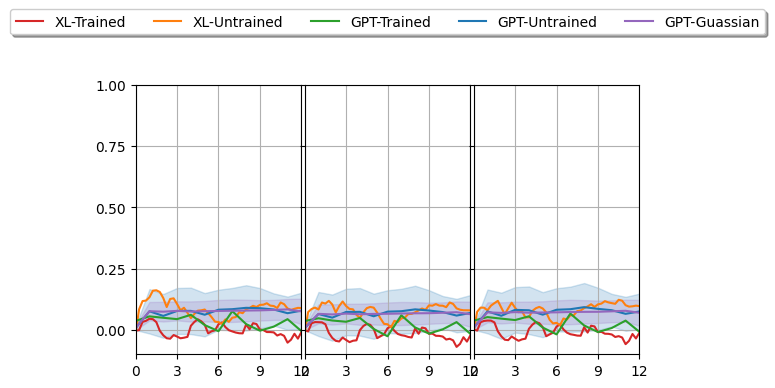

\begin{figure}
    \centering
    \includesvg[width=\linewidth]{inputs/fig/e1_categorical_prediction}
    \caption{caption for fig:e1 categorical prediction}
    \label{fig:e1_categorical_prediction}
    \end{figure} % \ref{fig:e1_categorical_prediction}


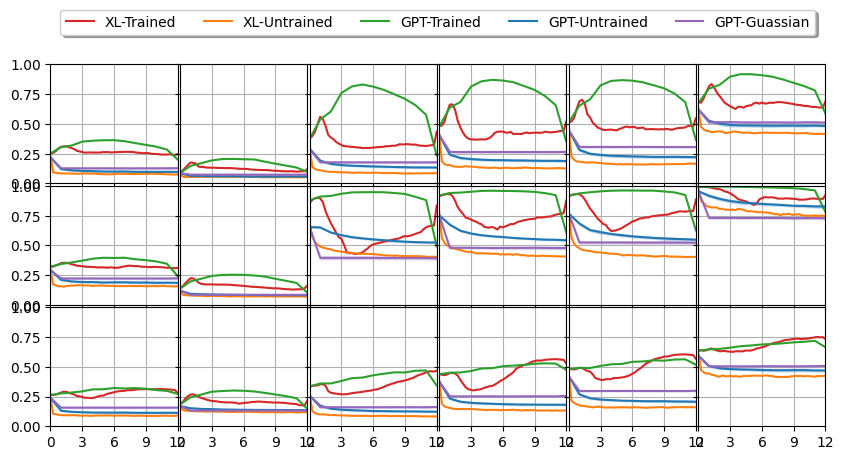

\begin{figure}
    \centering
    \includesvg[width=\linewidth]{inputs/fig/e1_ngram_prediction}
    \caption{caption for fig:e1 ngram prediction}
    \label{fig:e1_ngram_prediction}
    \end{figure} % \ref{fig:e1_ngram_prediction}


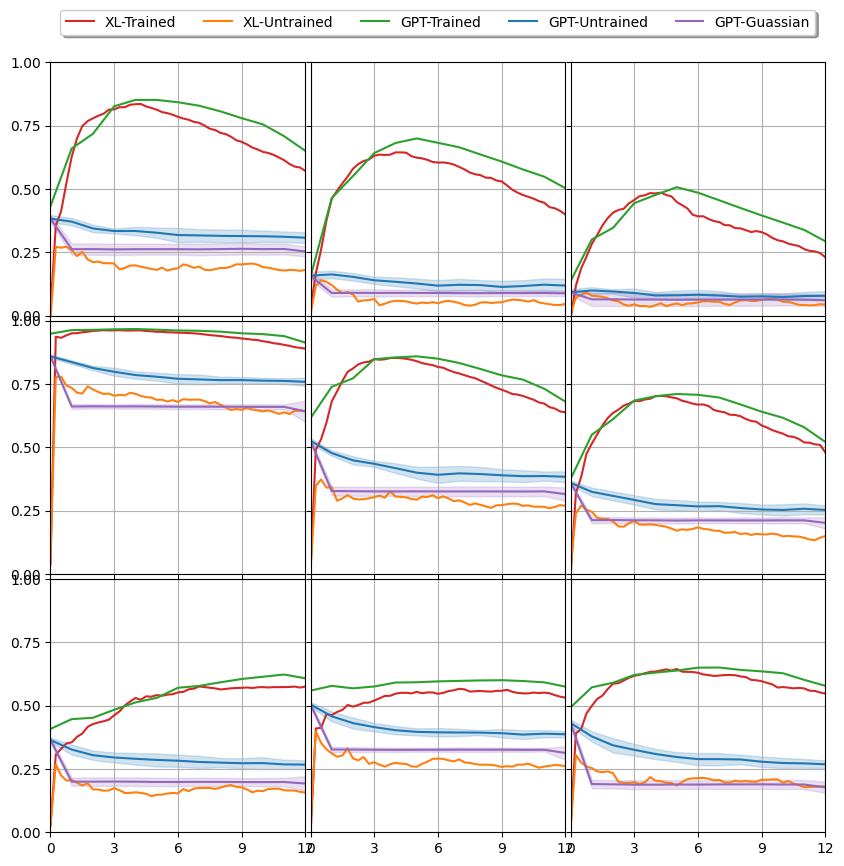

In [4]:
# ========================================
# Plotting Functions
# ========================================

# Reload utilities
_=importlib.reload(my_latex_tools)
from my_latex_tools import *
_=importlib.reload(DataDisplayer)
DD = DataDisplayer.DataDisplayer(PM)

def plot_data(scores_df, y1lim=0, title='Model Prediction of Part-of-Speech Tags.', xlabel='Layer Index', ylabel='Pearson R'):
    """
    Plot scores for model predictions across layers.

    Args:
        scores_df (pd.DataFrame): DataFrame containing scores.
        y1lim (float, optional): Lower y-limit (default is 0).
        title (str, optional): Plot title.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
    """
    fig_size = (6.5, 4.5)
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_size)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Plot the scores for each model
    for model, df in scores_df.groupby("model", sort=False):
        color = DD.model_to_linecolor[model]
        ls = DD.model_to_linestyle[model]
        label = DD.model_to_label[model]
        ax.plot(df["layer_idx"], df["score"], label=label, color=color, ls=ls)
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend to the right
    plt.ylim(y1lim, 1)
    plt.show()

def plot_means(data_df, y1lim=0, xlabel='Layer Index', ylabel='Pearson R'):
    """
    Plot mean and standard deviation of scores across layers.

    Args:
        data_df (pd.DataFrame): DataFrame containing scores.
        y1lim (float, optional): Lower y-limit (default is 0).
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
    """
    fig, ax = plt.subplots()
    
    # Plot mean and standard deviation for each model group
    for i, (group_name, df) in enumerate(data_df.groupby('model_group')):
        if group_name not in ["Guassian", "Untrained"]:
            ax.plot(df.set_index('layer_idx')['score'], label=group_name, color=mpl_colors[i])
            continue
        
        mean = df.groupby('layer_idx').score.mean()
        std = df.groupby('layer_idx').score.std()
        x = df.layer_idx.unique()
        ax.plot(mean, label=group_name, color=mpl_colors[i])
        ax.fill_between(x, mean - std, mean + std, color=mpl_colors[i], interpolate=True, alpha=0.2)
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend to the right
    ax.grid(visible=True, which='both', axis='both')  # Enable grid
    ax.set_ylim(y1lim, 1)
    ax.set_title('Mean Model Scores')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
               
def plot_data_multi_base_targets(data_df, base_targets=[], y1lim=0, ylabel='Pearson R', plot_label=""):
    """
    Plot data for multiple base targets, with separate subplots for each target.

    Args:
        data_df (pd.DataFrame): DataFrame containing scores for different models and layers.
        base_targets (list, optional): List of base target names to plot. Default is an empty list.
        y1lim (float, optional): Lower y-limit for the plots (default is 0).
        ylabel (str, optional): Label for the y-axis.
        plot_label (str, optional): Label for the saved plot (default is "").
    """
    fig_size = (10.5, 3.5 * len(base_targets))
    fig, axes = plt.subplots(len(base_targets), 3, sharex=True)
    axes = axes.reshape(len(base_targets), 3)
    fig.set_size_inches(fig_size)
    
    # Plot for each base target and its variations
    for i1, bt in enumerate(base_targets):
        for i2, target in enumerate([bt + "-", bt, bt + "+"]):
            ax = axes[i1, i2]
            target_df = select_data(data_df, target=target)
            ax.set_title(f"Model Prediction of {DD.display_target_names[target]}")
            ax.set_xlabel('Layer Index')
            ax.set_ylabel(ylabel)
            
            # Plot the scores for each model
            for model, df in target_df.groupby("model", sort=False):
                color = DD.model_to_linecolor[model]
                ls = DD.model_to_linestyle[model]
                label = DD.model_to_label[model]
                ax.plot(df["layer_idx"], df["score"], label=label, color=color, ls=ls)
                ax.set_ylim(y1lim, 1)
            
            # Add legend only for the middle plot
            if i1 == len(base_targets) // 2 and i2 == 2:
                ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend to the right
    
    # Save the figure for the thesis and display the plot
    save_figure_for_thesis(fig, fn=plot_label, v=0)
    plt.show()
    
# plot data litterally
# plot_data_multi_base_targets(linear_regression_res_df, base_targets=["sentence_idx"], 
#                              y1lim=-0.1, ylabel='Pearson R', plot_label="E1_sentence_prediction")
# plot_data_multi_base_targets(linear_regression_res_df, base_targets=["unigram_probs","bigram_probs","trigram_probs"], 
#                              y1lim=0,    ylabel='Pearson R', plot_label="E1_ngram_prediction")
# plot_data_multi_base_targets(logistic_regression_res_df, base_targets=['pos_tags', 'POS_12_id', 'POS_7_id'], y1lim=0, ylabel='Accuracy',plot_label="E1_POS_prediction")

def plot_means_multi_base_targets(data_df, base_targets=[], rev_xy=True, y1lim=0, y2lim=1, xlabel='Layer Index', ylabel='Pearson R', plot_label="", fig_height=10, legend_height_adjust=0.04):
    """
    Plot mean scores for multiple base targets with standard deviation shading.

    Args:
        data_df (pd.DataFrame): DataFrame containing the scores.
        base_targets (list, optional): List of base target names to plot. Default is an empty list.
        rev_xy (bool, optional): Whether to reverse x and y axes (default is True).
        y1lim (float, optional): Lower limit for the y-axis (default is 0).
        y2lim (float, optional): Upper limit for the y-axis (default is 1).
        xlabel (str, optional): Label for the x-axis (default is 'Layer Index').
        ylabel (str, optional): Label for the y-axis.
        plot_label (str, optional): Label for saving the plot.
        fig_height (float, optional): Height of the figure (default is 10).
        legend_height_adjust (float, optional): Height adjustment for the legend (default is 0.04).
    """
    plot_dims = (len(base_targets), 3)
    fig_size = (6.5, 3.5 * len(base_targets))
    if rev_xy: 
        plot_dims = plot_dims[::-1]
        fig_size = (10, fig_height)
    
    fig, axes = plt.subplots(*plot_dims, sharex=True, sharey=True, gridspec_kw={'hspace': 0.02, 'wspace': 0.02})
    axes = axes.reshape(*plot_dims)
    fig.set_size_inches(fig_size)

    # Iterate over base targets and plot means with standard deviation
    for i1, bt in enumerate(base_targets):
        for i2, target in enumerate([bt + "-", bt, bt + "+"]):
            i_x, i_y = i2, i1
            _ylabel = ylabel
            if rev_xy:
                i_x, i_y = (i_x, i_y)[::-1]
                if i_y == 0: ylabel2 = "Previous Word"
                if i_y == 1: ylabel2 = "Current Word"
                if i_y == 2: ylabel2 = "Next Word"
                _ylabel = f"{ylabel2}\n{ylabel}"

            ax = axes[i_y, i_x]
            target_df = select_data(data_df, target=target)
            ax.set_ylim(y1lim, y2lim)
            ax.set_xlim(0, 12)
            
            # Enable grid for each plot
            ax.grid(visible=True, which='both', axis='both')

            ax.set_xticks(list(range(0, 13, 3)))
            if y2lim == 1:
                ax.set_yticks([0.25 * x for x in range(5)])
            else:
                ax.set_yticks([-0.1] + [0.25 * x for x in range(3)])

            # Plot means and standard deviations for each model group
            for i, (group_name, group_df) in enumerate(target_df.groupby('model_group', sort=False)):
                color = DD.group_to_linecolor[group_name]
                label = group_name
                if group_name not in ["GPT-Guassian", "GPT-Untrained"]:
                    ax.plot(group_df['layer_idx'], group_df['score'], label=label, color=color)
                else:
                    layer_groups = group_df.groupby('layer_idx')
                    mean = layer_groups["score"].mean()
                    plot_idx = layer_groups["layer_idx"].mean()
                    std = layer_groups["score"].std()
                    maxs = mean + std
                    mins = mean - std
                    ax.plot(plot_idx, mean, label=label, color=color)
                    ax.fill_between(plot_idx, mins, maxs, color=color, interpolate=True, alpha=0.2)
    
    # Set labels and legends
    axbox1 = axes[0, 0].get_position()
    axbox2 = axes[0, plot_dims[1] - 1].get_position()
    center_x = (axbox1.x0 + axbox2.x1) / 2
    ax.legend(loc='center', ncol=5, fancybox=True, shadow=True, bbox_to_anchor=[center_x, axbox1.y1 + legend_height_adjust], bbox_transform=fig.transFigure)
    
    # Save the figure for the thesis and display the plot
    save_figure_for_thesis(fig, fn=plot_label, v=0)
    plt.show()

# ========================================
# Calls to plot images used in thesis
# ========================================
# plot means
# plot_means_multi_base_targets(logistic_regression_res_df, base_targets=['tree_depth','word_idx'], rev_xy=False,
#                               y1lim=0,    ylabel='Categorical Accuracy',  plot_label="E1_other_prediction")
# plot_means_multi_base_targets(df_all_res,  base_targets=['tree_depth','word_idx']+["sentence_idx"],
#                               fig_height=10, legend_height_adjust=0.04,
#                               y1lim=-0.1, y2lim=0.5, ylabel='Score', plot_label="E1_sentence_prediction")
plot_means_multi_base_targets(linear_regression_res_df,  base_targets=["sentence_idx"], rev_xy=False,
                              fig_height=3.5, legend_height_adjust=0.18,
                              y1lim=-0.1, ylabel='Mean Pearson R', plot_label="E1_sentence_prediction")
# plot_means_multi_base_targets(logistic_regression_res_df, base_targets=['pos_tags', 'POS_12_id', 'POS_7_id','function'][::1],
#                               fig_height=7, legend_height_adjust=0.06,
#                               y1lim=0,    ylabel='Categorical Accuracy',  plot_label="E1_POS_prediction")
plot_means_multi_base_targets(logistic_regression_res_df, base_targets=['tree_depth','word_idx']+['pos_tags', 'POS_12_id', 'POS_7_id','function'],
                              fig_height=4.7, legend_height_adjust=0.09,
                              y1lim=0,    ylabel='Accuracy',  plot_label="E1_categorical_prediction") #Categorical

plot_means_multi_base_targets(linear_regression_res_df,  base_targets=["unigram_probs","bigram_probs","trigram_probs"], 
                              fig_height=10, legend_height_adjust=0.04,
                              y1lim=0,    ylabel='Mean Pearson R', plot_label="E1_ngram_prediction")

